In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#
from sklearn import linear_model

In [152]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [153]:
newdf = pd.DataFrame(df, columns = ['Order Date', 'Ship Mode', 'Segment', 'Category', 'Sales'])
newdf.head()

,Order Date,Ship Mode,Segment,Category,Sales
0,08/11/2017,Second Class,Consumer,Furniture,261.9600
1,08/11/2017,Second Class,Consumer,Furniture,731.9400
2,12/06/2017,Second Class,Corporate,Office Supplies,14.6200
3,11/10/2016,Standard Class,Consumer,Furniture,957.5775
4,11/10/2016,Standard Class,Consumer,Office Supplies,22.3680


In [154]:
onehot = pd.get_dummies(df[['Ship Mode', 'Segment', 'Category']])
onehot.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,False,False,True,False,True,False,False,True,False,False
1,False,False,True,False,True,False,False,True,False,False
2,False,False,True,False,False,True,False,False,True,False
3,False,False,False,True,True,False,False,True,False,False
4,False,False,False,True,True,False,False,False,True,False


In [155]:
final = pd.concat([newdf, onehot], axis = 1)
final.drop(['Ship Mode', 'Segment', 'Category'], axis = 1, inplace = True)
final.head()

,Order Date,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,08/11/2017,261.9600,False,False,True,False,True,False,False,True,False,False
1,08/11/2017,731.9400,False,False,True,False,True,False,False,True,False,False
2,12/06/2017,14.6200,False,False,True,False,False,True,False,False,True,False
3,11/10/2016,957.5775,False,False,False,True,True,False,False,True,False,False
4,11/10/2016,22.3680,False,False,False,True,True,False,False,False,True,False


In [156]:
final['Order Date'] = pd.to_datetime(final['Order Date'], format = '%d/%m/%Y')

final.head()


,Order Date,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,2017-11-08,261.9600,False,False,True,False,True,False,False,True,False,False
1,2017-11-08,731.9400,False,False,True,False,True,False,False,True,False,False
2,2017-06-12,14.6200,False,False,True,False,False,True,False,False,True,False
3,2016-10-11,957.5775,False,False,False,True,True,False,False,True,False,False
4,2016-10-11,22.3680,False,False,False,True,True,False,False,False,True,False


In [157]:
final.sort_values(by = 'Order Date', inplace = True)
final.head()

,Order Date,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
7980,2015-01-03,16.448,False,False,False,True,True,False,False,False,True,False
741,2015-01-04,3.540,False,False,False,True,False,False,True,False,True,False
740,2015-01-04,272.736,False,False,False,True,False,False,True,False,True,False
739,2015-01-04,11.784,False,False,False,True,False,False,True,False,True,False
1759,2015-01-05,19.536,False,False,False,True,True,False,False,False,True,False


In [158]:
final.set_index('Order Date', inplace = True)
final.head()

,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
Order Date,,,,,,,,,,,
2015-01-03,16.448,False,False,False,True,True,False,False,False,True,False
2015-01-04,3.540,False,False,False,True,False,False,True,False,True,False
2015-01-04,272.736,False,False,False,True,False,False,True,False,True,False
2015-01-04,11.784,False,False,False,True,False,False,True,False,True,False
2015-01-05,19.536,False,False,False,True,True,False,False,False,True,False


In [159]:
# Assuming 'final' is your DataFrame with 'Order Date' as index and 'Sales' as a column

# Extract year and month from the index and format as "YYYY-MM"
final['YearMonth'] = final.index.strftime('%Y-%m')

# Group by 'YearMonth', summing the sales
monthly_sales = final.groupby('YearMonth')['Sales'].sum().reset_index()

# Set 'YearMonth' as the new index
monthly_sales = monthly_sales.set_index('YearMonth')
(monthly_sales)

,Sales
YearMonth,
2015-01,14205.7070
2015-02,4519.8920
2015-03,55205.7970
2015-04,27906.8550
2015-05,23644.3030
2015-06,34322.9356
2015-07,33781.5430
2015-08,27117.5365
2015-09,81623.5268


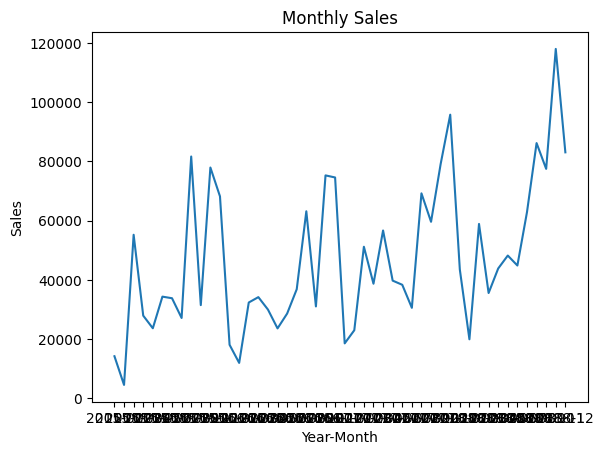

In [160]:
%matplotlib inline
plt.plot(monthly_sales.index, monthly_sales['Sales'])
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

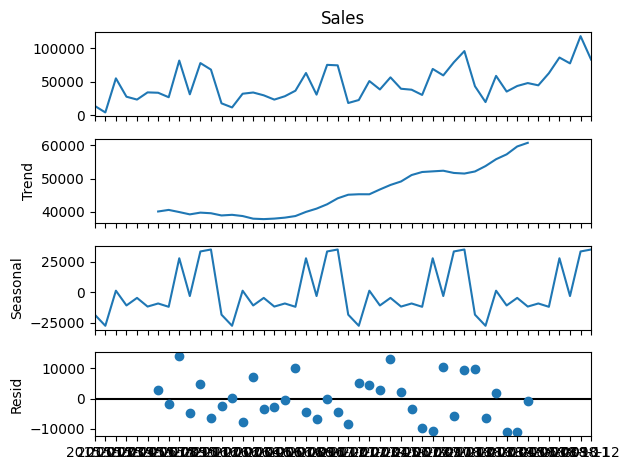

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_sales['Sales'], model='additive', period=12)
result.plot()
plt.show()

In [162]:
len(monthly_sales)

48

In [163]:
trainset = monthly_sales.iloc[:36]
testset = monthly_sales.iloc[36:]

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trainset_scaled = scaler.fit_transform(trainset)
testset_scaled = scaler.transform(testset)

In [165]:
!pip install keras
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(trainset_scaled, trainset_scaled, length=n_input, batch_size=1)

In [166]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [218]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
#model.add(LSTM(100, activation='relu'))  # Additional LSTM layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 100)           40800     
                                                                 
 dense_5 (Dense)             (None, 12, 1)             101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [258]:
model.fit(generator, epochs = 500)

Epoch 1/500
24/24 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 3/500
24/24 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 5/500
24/24 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 6/500
24/24 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 7/500
24/24 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 8/500
24/24 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 9/500
24/24 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 10/500
24/24 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 11/500
24/24 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 12/500
24/24 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 13/500
24/24 [================

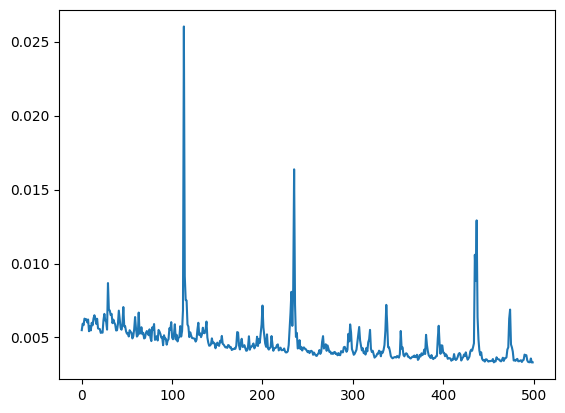

In [259]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [260]:
last_train_batch = trainset_scaled[-12:]
last_train_batch = last_train_batch.reshape((1,n_input, n_features))

In [261]:
last_train_batch

array([[[0.15372416],
        [0.20235781],
        [0.51135235],
        [0.37448108],
        [0.5715573 ],
        [0.38593391],
        [0.37054568],
        [0.28527218],
        [0.70898976],
        [0.60363524],
        [0.81722466],
        [1.        ]]])

In [262]:
last_pred=  model.predict(last_train_batch)

1/1 [==============================] - 0s 31ms/step


In [263]:
testset_scaled[0]

array([0.42706546])

In [264]:
import math
from sklearn.metrics import mean_squared_error

In [265]:
import numpy as np

# Assuming n_input is 12 as per your previous examples
n_input = 12

# Initial input for prediction: last n_input values from trainset_scaled
initial_input = trainset_scaled[-n_input:]
initial_input = initial_input.reshape((1, n_input, 1))  # Reshape for LSTM input (samples, time steps, features)

# Initialize an empty list to store predictions
predictions = []

# Number of time steps you want to predict
num_predictions = len(testset_scaled)  # Adjust this based on your specific scenario

# Iterate to predict each time step
current_input = initial_input
for i in range(num_predictions):
    # Predict the next time step
    next_pred = model.predict(current_input)

    # Store the prediction
    predictions.append(next_pred[0, 0])  # Assuming predicting one value at a time

    # Update current_input to include the new prediction
    current_input = np.roll(current_input, -1, axis=1)  # Shift the array left
    current_input[0, -1, 0] = next_pred[0,0]  # Replace the last element with the prediction

# Print or use predictions as needed
print(predictions)


1/1 [==============================] - 0s 26ms/step
[array([0.2415345], dtype=float32), array([0.28871953], dtype=float32), array([0.53132814], dtype=float32), array([0.43124563], dtype=float32), array([0.5816965], dtype=float32), array([0.43936765], dtype=float32), array([0.42846578], dtype=float32), array([0.36961573], dtype=float32), array([0.7169757], dtype=float32), array([0.61256385], dtype=float32), array([0.81091475], dtype=float32), array([0.96819437], dtype=float32)]


In [266]:
#predictions = scaler.inverse_transform(predictions)

In [267]:
#plt.plot(testset.index, testset['Sales'])
#plt.plot(testset.index, predictions, color='red')
#plt.xlabel('Year-Month')
#plt.ylabel('Sales')
#plt.title('Monthly Sales')

In [268]:
mse = mean_squared_error(testset_scaled, predictions)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.18788962543900226


Text(0.5, 1.0, 'Monthly Sales')

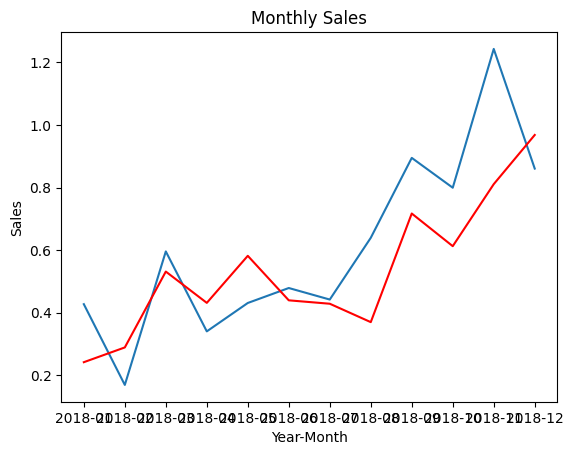

In [269]:
plt.plot(testset.index, testset_scaled)
plt.plot(testset.index, predictions, color='red')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')

In [270]:
print(testset_scaled)

[[0.42706546]
 [0.16883617]
 [0.59574633]
 [0.340082  ]
 [0.43089698]
 [0.47874594]
 [0.44184995]
 [0.63931648]
 [0.89490995]
 [0.79948318]
 [1.24335915]
 [0.86067924]]


In [273]:
RMSE = scaler.inverse_transform([[rmse]])
RMSE

array([[21659.03876964]])